# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?


In [ ]:
''' 
Histogram:
Pros:
    Provides a clear visual representation of the frequency distribution of prices.
    Useful for understanding the overall shape of the distribution (e.g., skewness or modality).
    Shows how the data is spread across different price ranges.
Cons:
    The bins might be misleading if not appropriately chosen, as they can over-simplify or obscure the distribution.
    Outliers may not be as obvious, as they might get grouped with more frequent ranges.
    It is harder to assess specific statistics (like medians, quartiles, and outliers) without additional annotations.

Boxplot:
Pros:
    Clearly displays key statistics such as the median, interquartile range (IQR), and outliers.
    Offers an easy way to identify extreme values (outliers), which are important when identifying the more expensive drugs.
    Less sensitive to the choice of binning, providing a cleaner summary of the distribution's central tendency and spread.
Cons:
    Doesn’t provide much detail about the shape of the distribution.
    Doesn’t show the full distribution, making it harder to see how values cluster in specific ranges.

I would choose the boxplot for answering the administrator's question about the prices of the more expensive drugs, as it provides clear insight into the higher-end prices and outliers. It would easily allow you to identify any particularly expensive drugs.

Formatting suggestions:
I would include betting labels and annotations for both graphs as they were lacking for both.
'''

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

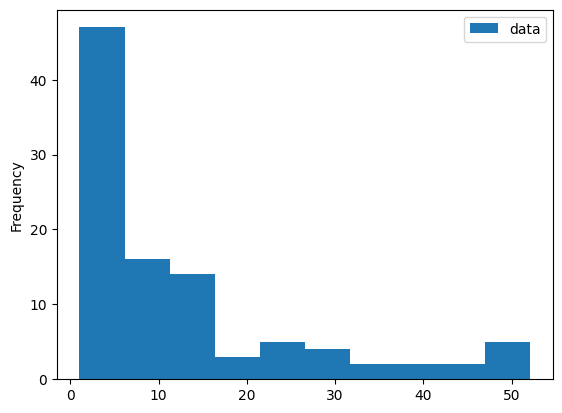

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

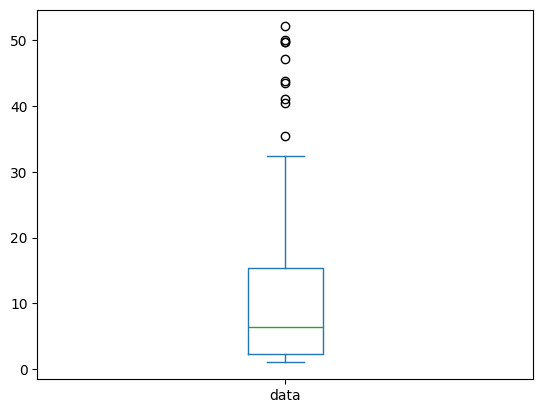

In [4]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Best Show by Year Netflix.csv')

data.head()

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
0,Monty Python's Flying Circus,1969,8.8,4,comedy,GB
1,Knight Rider,1982,6.9,4,action,US
2,Seinfeld,1989,8.9,9,comedy,US
3,Star Trek: Deep Space Nine,1993,8.1,7,scifi,US
4,Neon Genesis Evangelion,1995,8.5,1,scifi,JP


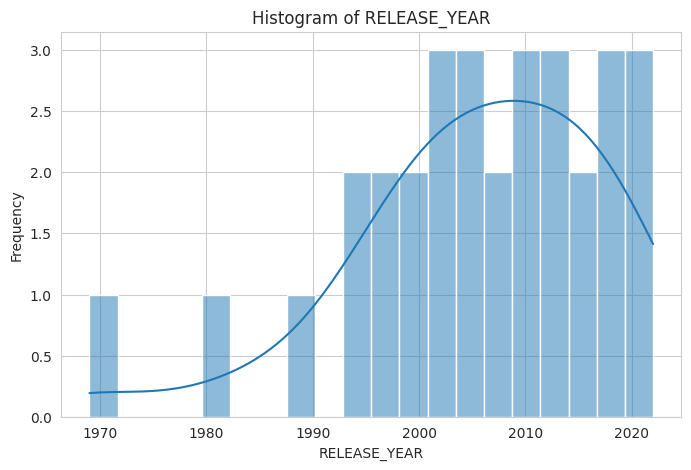

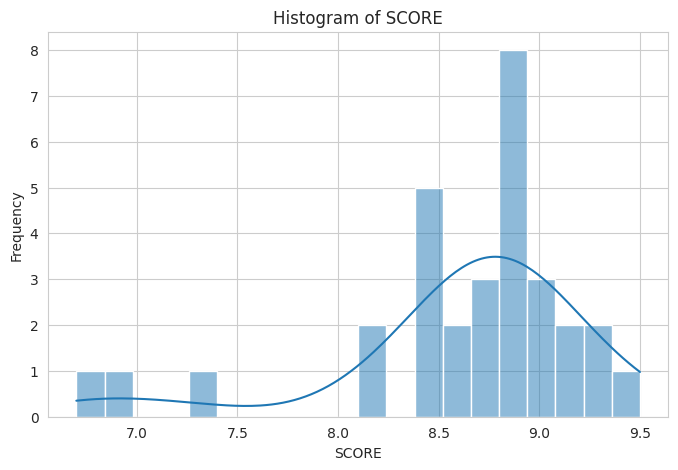

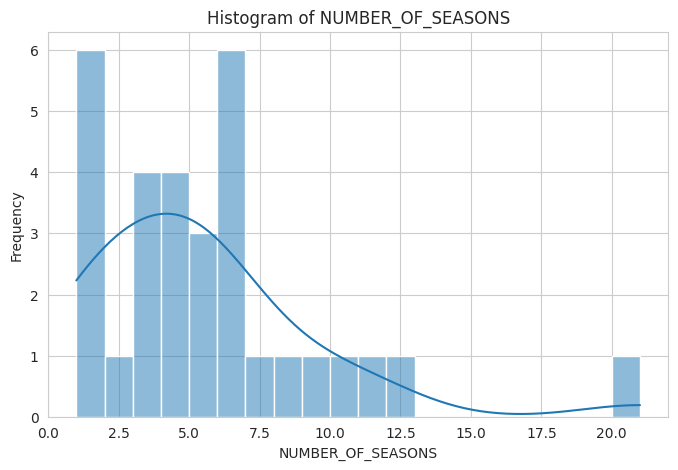

In [6]:
sns.set_style("whitegrid")

# List of numeric columns
numeric_columns = ['RELEASE_YEAR', 'SCORE', 'NUMBER_OF_SEASONS']

# Generate histograms
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

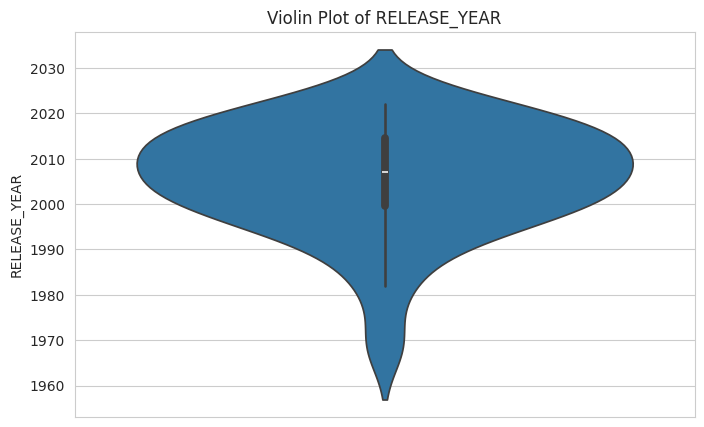

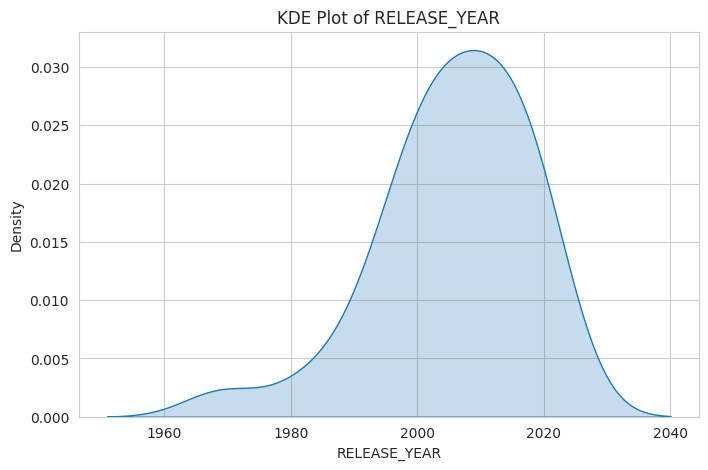

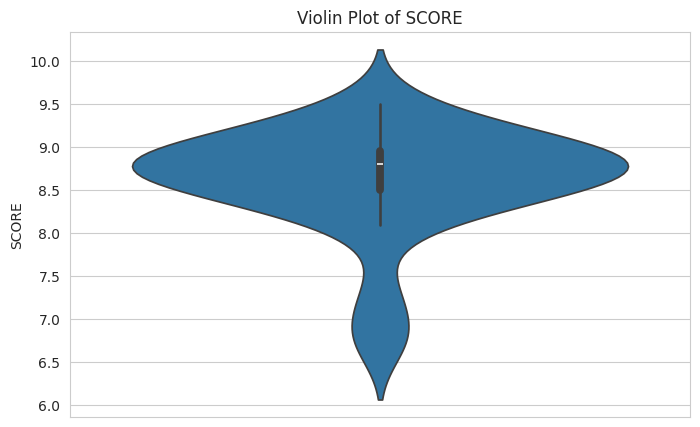

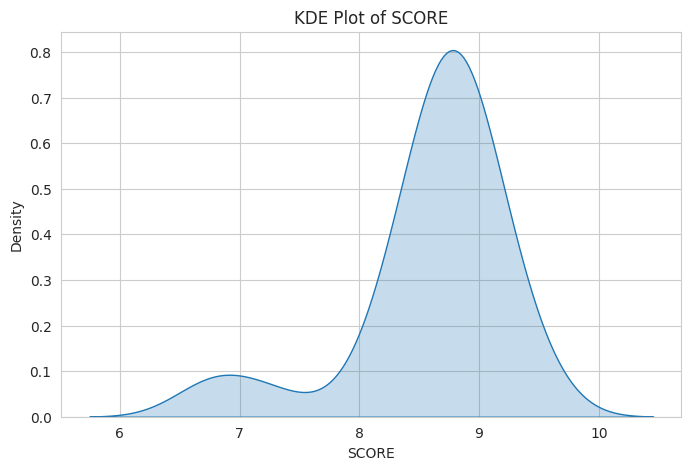

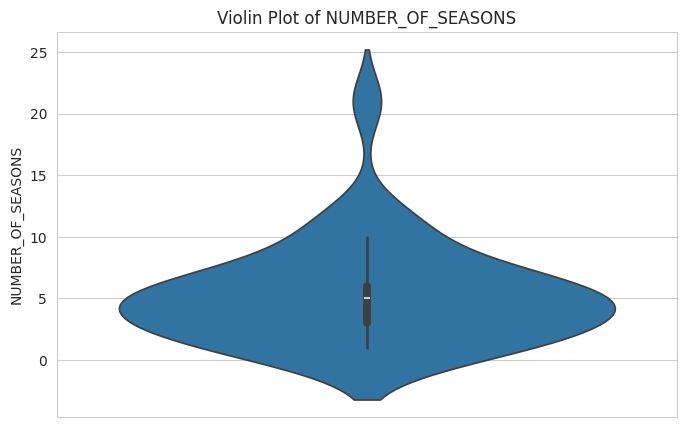

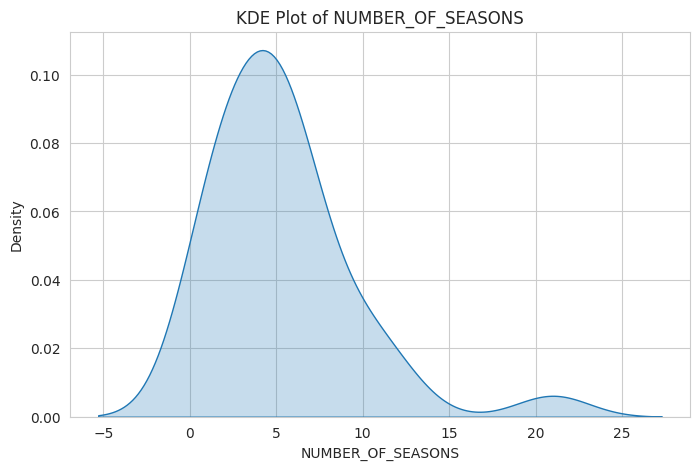

In [7]:
# Ensure numeric columns are valid
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Generate Violin and KDE Plots
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.violinplot(y=data[column].dropna())  # Drop NaN values
    plt.title(f"Violin Plot of {column}")
    plt.ylabel(column)
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.kdeplot(data[column].dropna(), fill=True)  # Drop NaN values
    plt.title(f"KDE Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

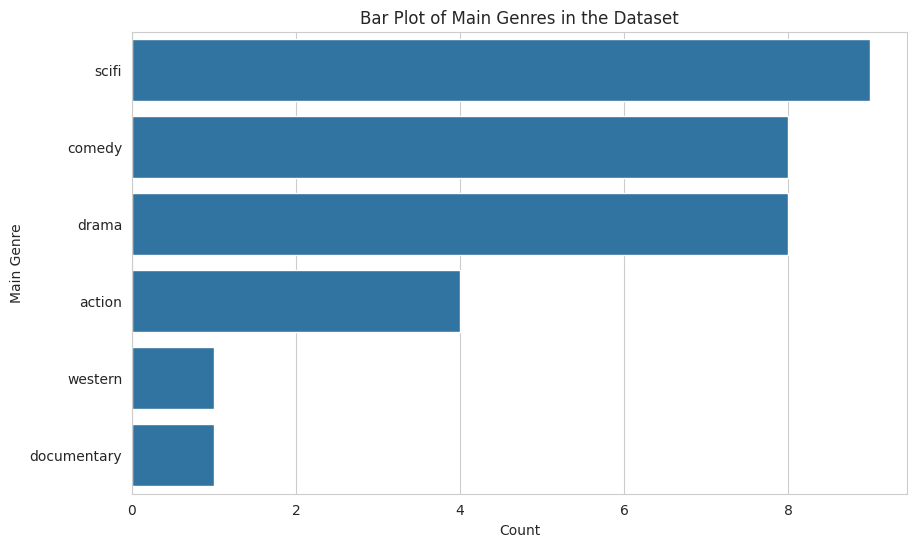

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(y=data["MAIN_GENRE"], order=data["MAIN_GENRE"].value_counts().index)
plt.title("Bar Plot of Main Genres in the Dataset")
plt.xlabel("Count")
plt.ylabel("Main Genre")
plt.show()

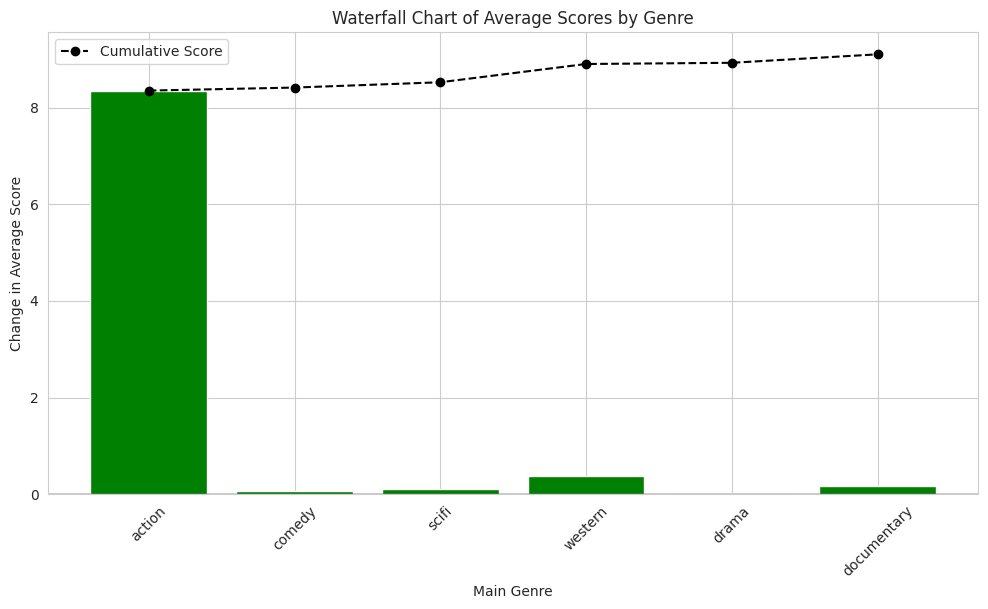

In [9]:
import numpy as np

# Compute average score per genre
data_avg_score = data.groupby("MAIN_GENRE")["SCORE"].mean().sort_values()
index = data_avg_score.index
values = data_avg_score.values

# Compute changes for waterfall effect
changes = np.insert(np.diff(values), 0, values[0])

plt.figure(figsize=(12, 6))
bars = plt.bar(index, changes, color=["green" if x > 0 else "red" for x in changes])
plt.plot(index, np.cumsum(changes), marker="o", color="black", linestyle="dashed", label="Cumulative Score")
plt.axhline(0, color="black", linewidth=1)

plt.title("Waterfall Chart of Average Scores by Genre")
plt.xlabel("Main Genre")
plt.ylabel("Change in Average Score")
plt.xticks(rotation=45)
plt.legend()
plt.show()